<div style="color: black; font-size: 20px; font-weight: bold;">
  Bank Customer Churn Prediction Using Artificial Neural Network (ANN)
</div>

This tutorial focuses on predicting customer churn, which entails analyzing why customers discontinue their services with a bank. Specifically, we will explore churn within the banking sector. We aim to develop a deep learning model to accurately predict churn rates and will evaluate the model's performance using precision, recall, and F1-score metrics.

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

Load the csv file

In [2]:
dataset = pd.read_csv('Bank_Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Delete the unneccessary columns

In [3]:
dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
dataset.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Data Visualization "Exit vs Not Exit"

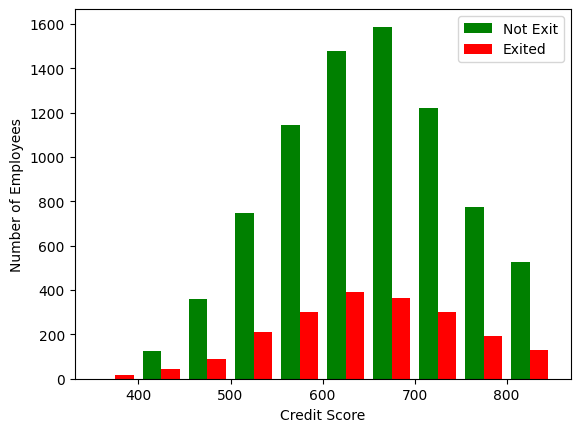

In [5]:
creditscore_exited_zero = dataset[dataset.Exited==0].CreditScore
creditscore_exited_one = dataset[dataset.Exited==1].CreditScore

plt.hist([creditscore_exited_zero, creditscore_exited_one], label=['Not Exit', 'Exited'], color=['green', 'red'])
plt.xlabel('Credit Score')
plt.ylabel('Number of Employees')
plt.legend()

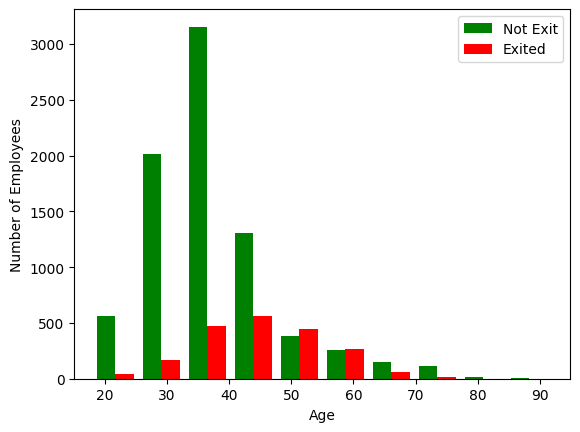

In [6]:
age_exited_zero = dataset[dataset.Exited==0].Age
age_exited_one = dataset[dataset.Exited==1].Age

plt.hist([age_exited_zero, age_exited_one], label=['Not Exit', 'Exited'], color=['green', 'red'])
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.legend()

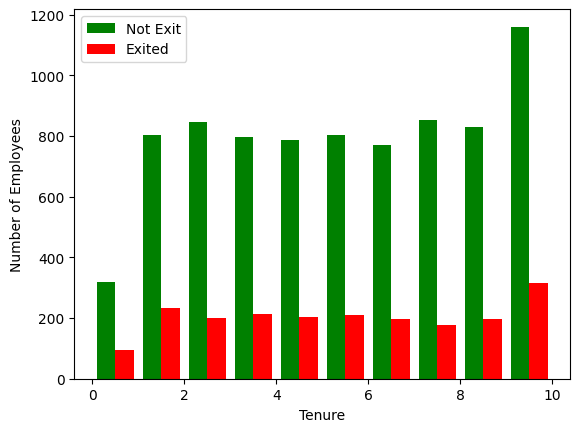

In [7]:
tenure_exited_zero = dataset[dataset.Exited==0].Tenure
tenure_exited_one = dataset[dataset.Exited==1].Tenure

plt.hist([tenure_exited_zero, tenure_exited_one], label=['Not Exit', 'Exited'], color=['green', 'red'])
plt.xlabel('Tenure')
plt.ylabel('Number of Employees')
plt.legend()

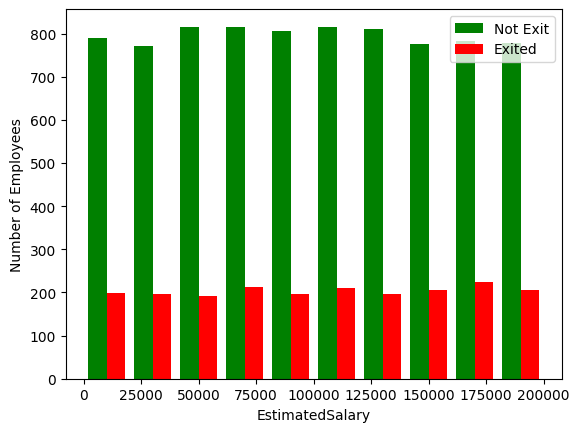

In [8]:
est_salary_exited_zero = dataset[dataset.Exited==0].EstimatedSalary
est_salary_exited_one = dataset[dataset.Exited==1].EstimatedSalary

plt.hist([est_salary_exited_zero, est_salary_exited_one], label=['Not Exit', 'Exited'], color=['green', 'red'])
plt.xlabel('EstimatedSalary')
plt.ylabel('Number of Employees')
plt.legend()

In [9]:
dataset.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
dataset['Gender'].replace({'Female': 0,'Male': 1}, inplace=True)
dataset.dtypes

C:\Users\Umair\AppData\Local\Temp\ipykernel_22156\2846280976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Gender'].replace({'Female': 0,'Male': 1}, inplace=True)
C:\Users\Umair\AppData\Local\Temp\ipykernel_22156\2846280976.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
dataset = pd.get_dummies(dataset, columns=['Geography'])
dataset = dataset.astype({col: 'uint8' for col in dataset.select_dtypes(include='bool').columns})
dataset.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [12]:
# Specific Scaling
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

dataset[cols_to_scale] = scaler.fit_transform(dataset[cols_to_scale])

In [13]:
dataset

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


In [14]:
for col in dataset:
    print(f'{col}: {dataset[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [15]:
X = dataset.drop('Exited', axis='columns')
y = dataset['Exited']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Build a model (ANN) in tensorflow/keras

In [17]:
# Initialize the ANN
model = tf.keras.models.Sequential()

# Add the input layer and the first hidden layer
model.add(tf.keras.layers.Dense(units=6, activation='relu'))  # units=6 recommended

# Add the second hidden layer
model.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Add the output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [18]:
# Part-3: Train the ANN -----------------------------------------------------------------------------
# Compile the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN on the Training set
model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step - accuracy: 0.7696 - loss: 0.5688
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.7926 - loss: 0.4980
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.8042 - loss: 0.4661
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.7905 - loss: 0.4764
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.7894 - loss: 0.4734
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.8004 - loss: 0.4534
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.8054 - loss: 0.4441
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.8111 - loss: 0.4378
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.8125 - loss: 0.4340
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.8203 - loss: 0.4176
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.8117 - loss: 0.4300
Epoch 12/100
250/25

In [19]:
y_pred = model.predict(X_test)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step


array([[0.39041024],
       [0.4608959 ],
       [0.21289721],
       ...,
       [0.24837863],
       [0.17774975],
       [0.22638139]], dtype=float32)

In [20]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.8503 - loss: 0.3376


[0.3441709876060486, 0.8539999723434448]

In [24]:
y_pred_updated = []
for element in y_pred:
    if element > 0.5:
        y_pred_updated.append(1)
    else:
        y_pred_updated.append(0)

In [30]:
# Precision: correct prediction
# Recall:    wrong prediction
# f1_score:  combines precision and recall in a single metric
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred_updated))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.68      0.53      0.59       405

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.84      0.85      0.85      2000



Text(95.72222222222221, 0.5, 'Truth')

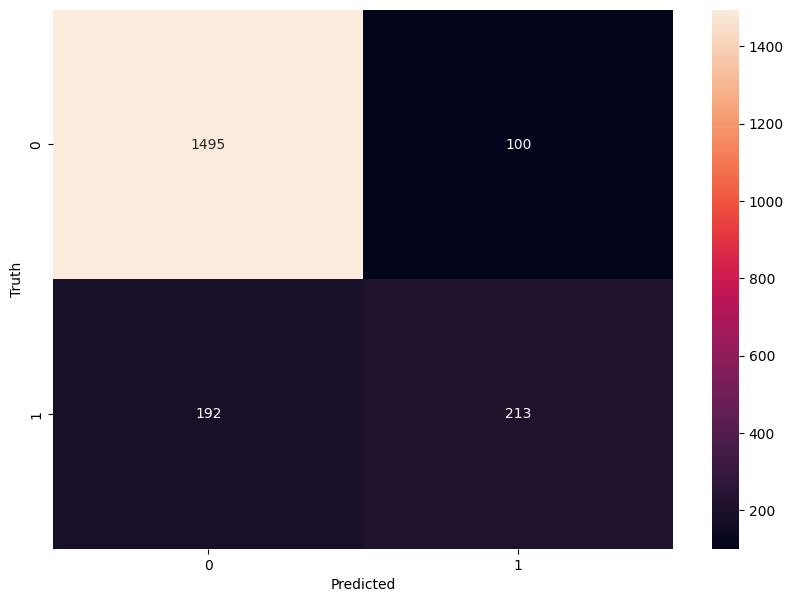

In [29]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_updated)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')